# **Hotel Customer Cancellation Prediction**

## [Link to dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

Dataset has following attributes:
* Booking_ID $:$ *unique identifier of each booking*
* no_of_adults $:$ *Number of adults*
* no_of_children $:$ *Number of Children*
* no_of_weekend_nights $:$ *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*
* no_of_week_nights $:$ *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*
* type_of_meal_plan $:$ *Type of meal plan booked by the customer:*
* required_car_parking_space $:$ *Does the customer require a car parking space?*
* room_type_reserved $:$ *Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.*
* lead_time $:$ *Number of days between the date of booking and the arrival date*
* arrival_year $:$ *Year of arrival date*
* arrival_month $:$ *Month of arrival date*
* arrival_date $:$ *Date of the month*
* market_segment_type $:$ *Market segment designation.*
* repeated_guest $:$ *Is the customer a repeated guest?*
* no_of_previous_cancellations $:$ *Number of previous bookings that were canceled by the customer prior to the current booking*
* no_of_previous_bookings_not_canceled $:$ *Number of previous bookings not canceled by the customer prior to the current booking*
* avg_price_per_room $:$ *Average price per day of the reservation; prices of the rooms are dynamic. (in euros)*
* no_of_special_requests $:$ *Total number of special requests made by the customer (e.g. high floor, view from the room, etc)*
* **booking_status: Target variable, flag indicating if the booking was canceled or not.**

**Contents:**
1. [Import libraries and data](#section-one)
1. [Exploratory Data Analysis](#section-two)
1. [Overcoming challenges](#section-three)
1. [Preparation and implementation of ML models](#section-four)
1. [Results evaluation](#section-five)

<a id=section-one></a>
# <span style="color:#409996;font-weight:600;font-size:30px;font-style:sans-serif;">1. Import libraries and data</span>

In [1]:
#import data manipulation and visualisation libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#attributes normalisation
from scipy.stats import yeojohnson

#encoder
from sklearn import preprocessing

# Standardize the data
from sklearn.preprocessing import MinMaxScaler

#rebalancing target variable
from imblearn.over_sampling import RandomOverSampler

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC


#evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#other libraries
import math
from collections import Counter
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

#set no randomness
np.random.seed(0)

In [2]:
#load data from csv file
dataset = pd.read_csv('./Datasets/Hotel-Reservations.csv')

<a id=section-two></a>
# <span style="color:#409996;font-weight:600;font-size:30px;font-style:sans-serif;">2. Exploratory Data Analysis</span>

We perform Exploratory Data Analysis or EDA to:
1. Understand dataset variables
1. Clean dataset
1. Plot dataset variables
1. Analyze relationships between variables

**2.1 Understanding dataset variables**

In [3]:
#view first 5 rows
# dataset.head(50)
dataset[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                                'no_of_week_nights', 'required_car_parking_space', 'repeated_guest',
                                'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'booking_status']].head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,booking_status
0,2,0,1,2,0,0,0,0,Not_Canceled
1,2,0,2,3,0,0,0,0,Not_Canceled
2,1,0,2,1,0,0,0,0,Canceled
3,2,0,0,2,0,0,0,0,Canceled
4,2,0,1,1,0,0,0,0,Canceled


In [4]:
#number of rows and attributes
dataset.shape

(36275, 19)

In [5]:
#names of all present attributes in the dataset
dataset.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
#datatypes of all present attributes in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#statistic metrics for continuous variables without scientific notation
dataset.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
#check discrete variables 
print("Unique values of booking_status:", dataset.booking_status.unique())

Unique values of booking_status: ['Not_Canceled' 'Canceled']


In [9]:
#check, whether there are duplicate customers
print("From all {all} bookings, {num} of them are unique.".format(all = len(dataset),num = len(dataset.Booking_ID.unique())))

From all 36275 bookings, 36275 of them are unique.


**2.2 Cleaning dataset**

In [10]:
#feature selection = drop redundant attributes
dataset = dataset.drop(labels=['Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date', 'type_of_meal_plan', 
                                'room_type_reserved', 'no_of_special_requests', 'market_segment_type', 'avg_price_per_room'], axis=1)

In [11]:
#check for missing values
print("Missing values in the dataset:\n\n",dataset.isna().sum())

Missing values in the dataset:

 no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
booking_status                          0
dtype: int64


**2.3 Plot dataset attributes**

Let's plot possible features (attributes that can be useful to predict value of target variable) into barcharts to see the distribution of values.

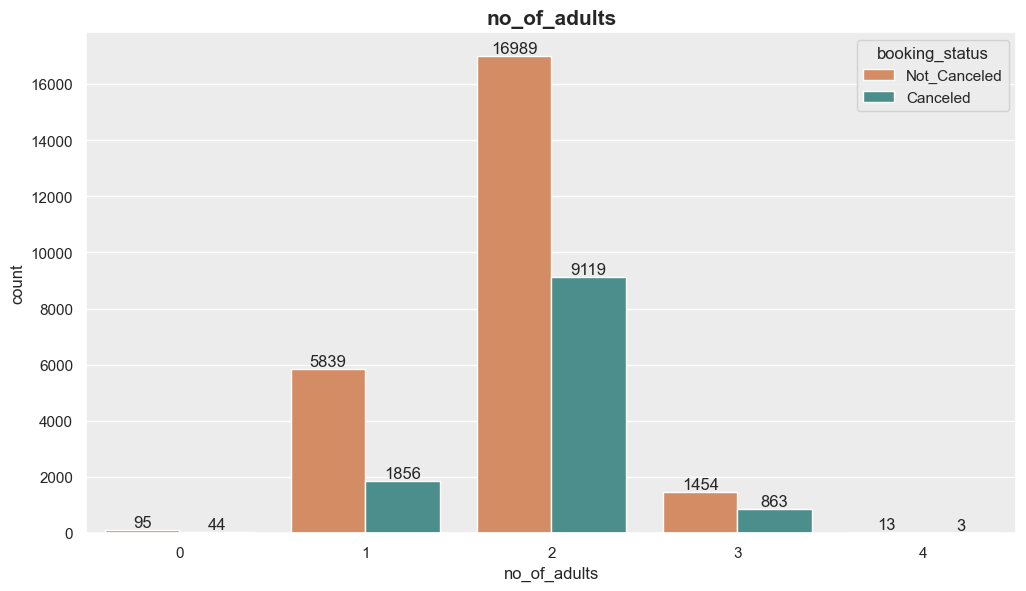

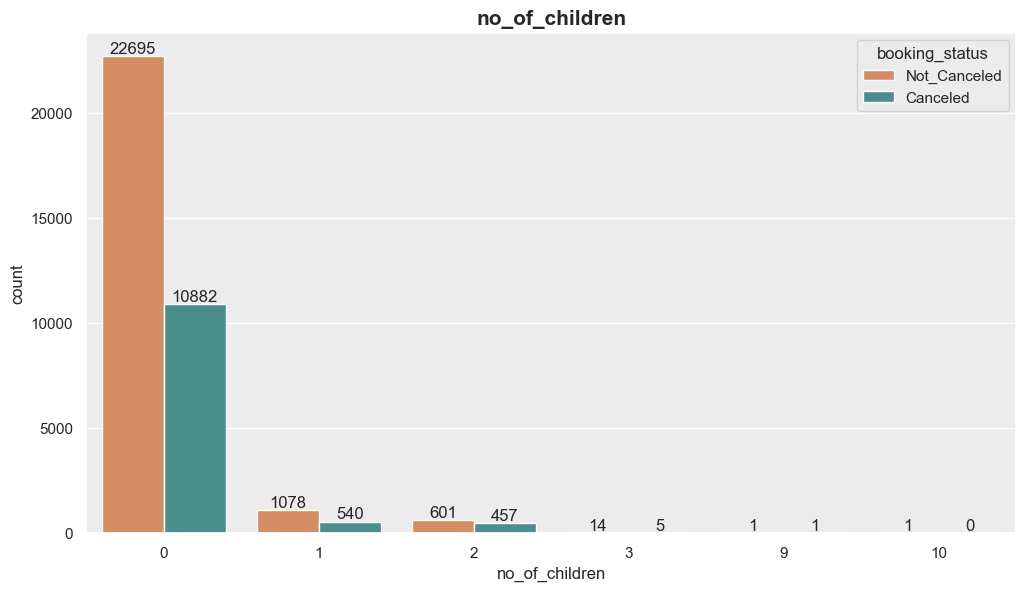

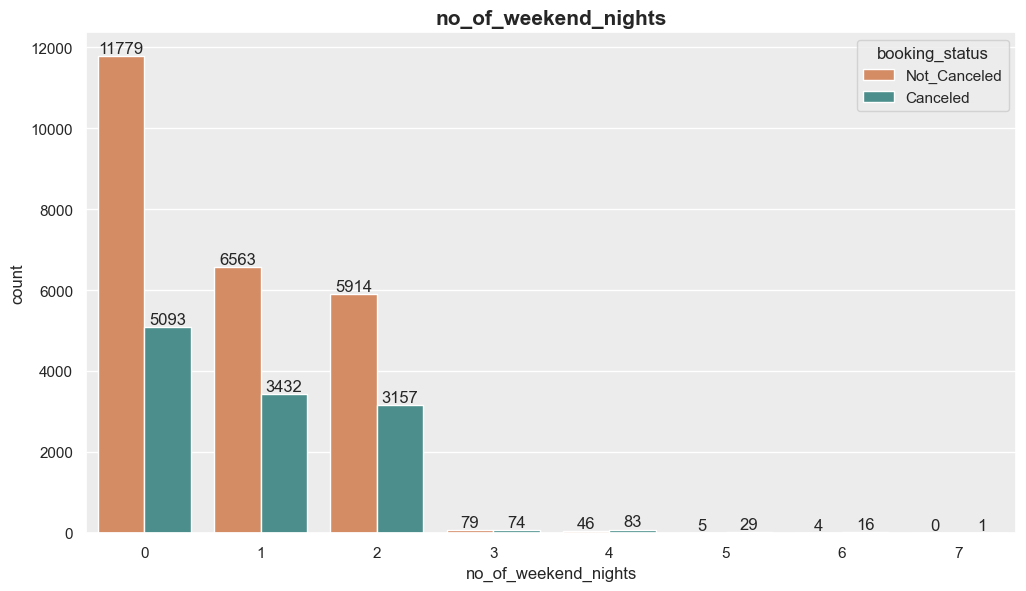

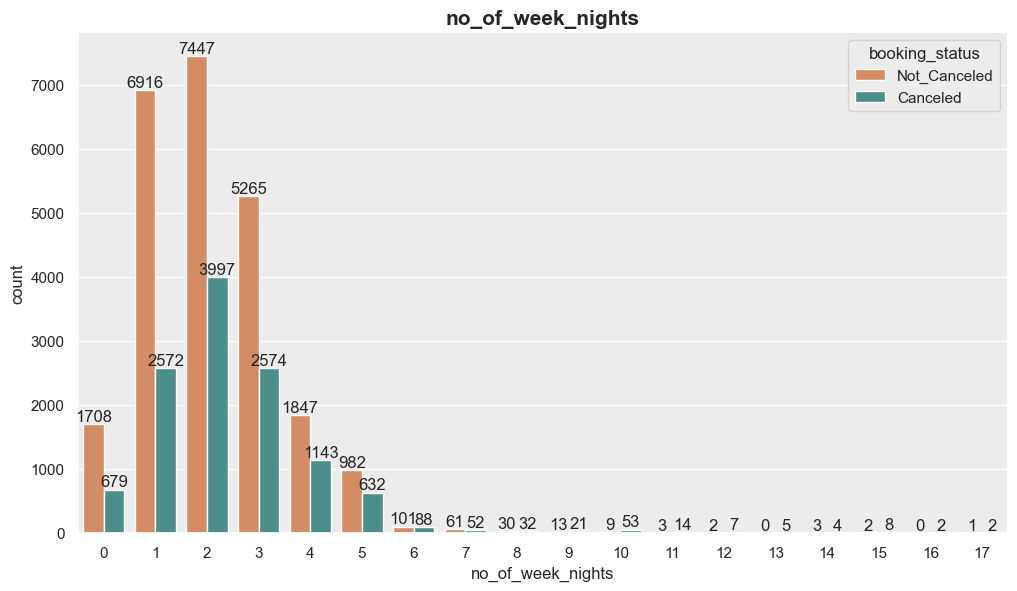

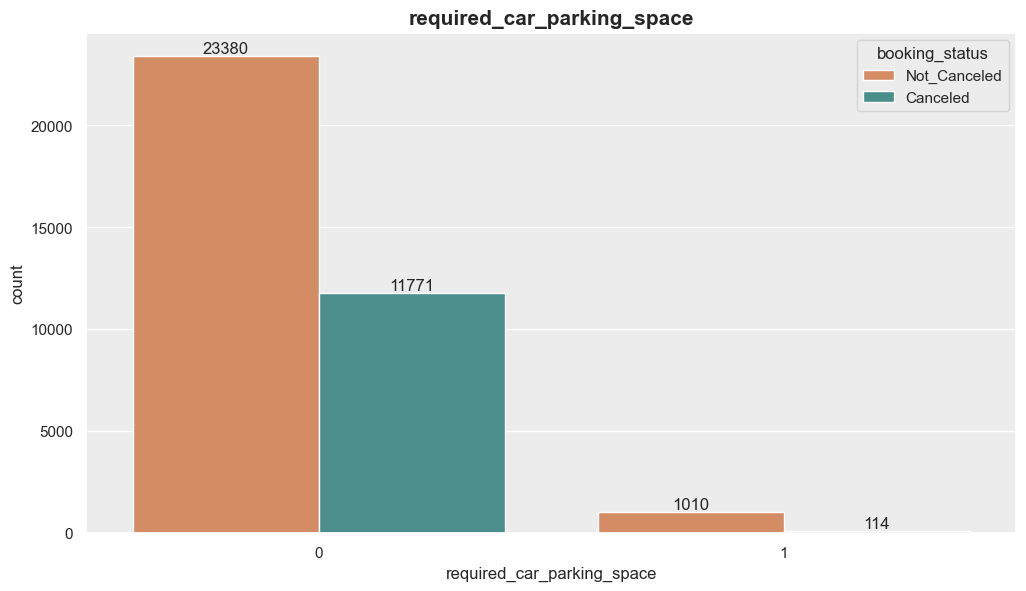

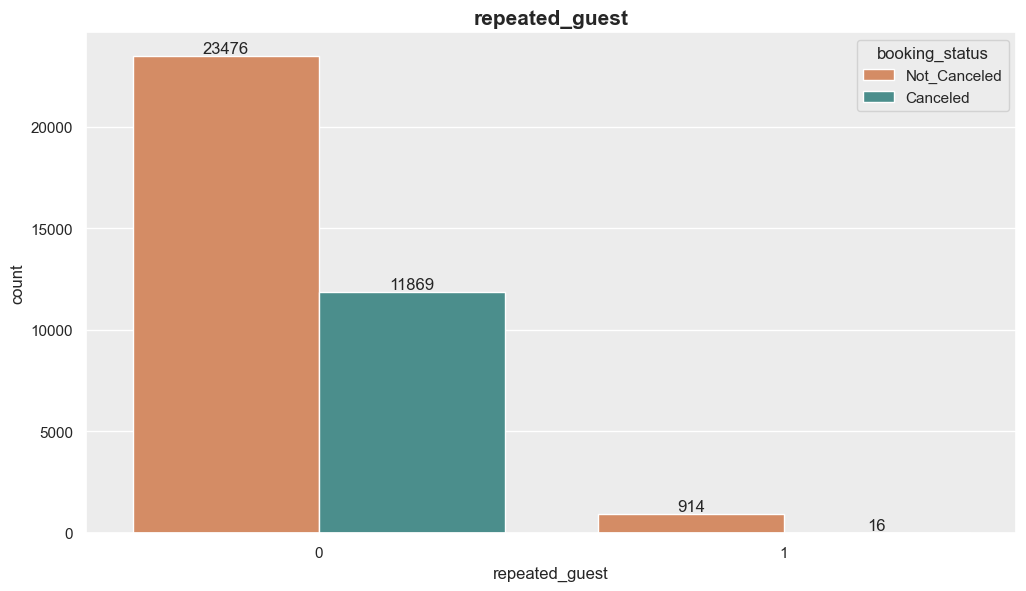

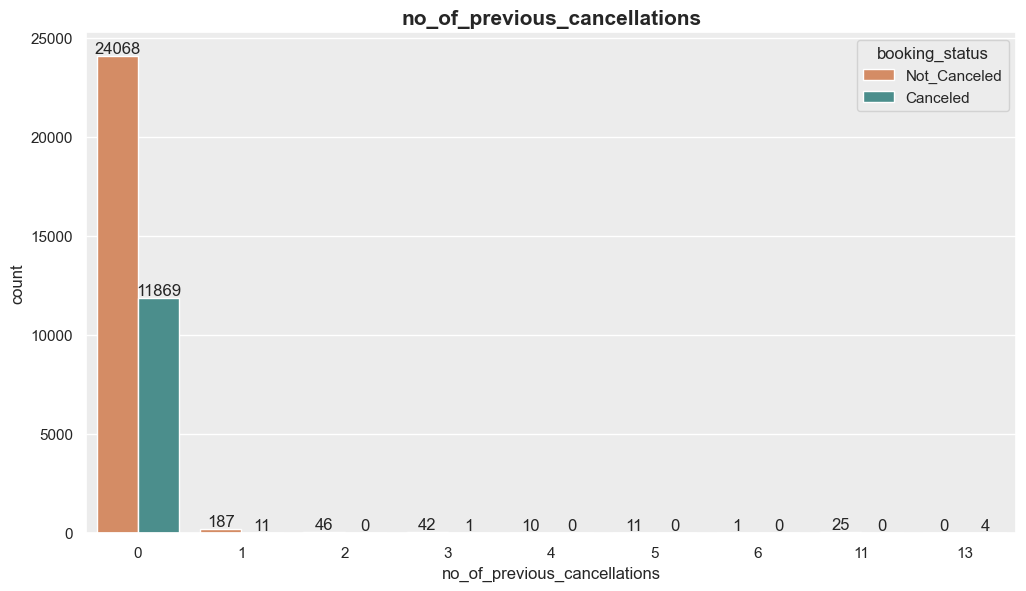

In [12]:
#create a list of categorical features and plot them
list_of_cat_features = dataset[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                                'no_of_week_nights', 'required_car_parking_space', 'repeated_guest',
                                'no_of_previous_cancellations']]
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.countplot(data = dataset, x = list_of_cat_features[feature], hue = 'booking_status', palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

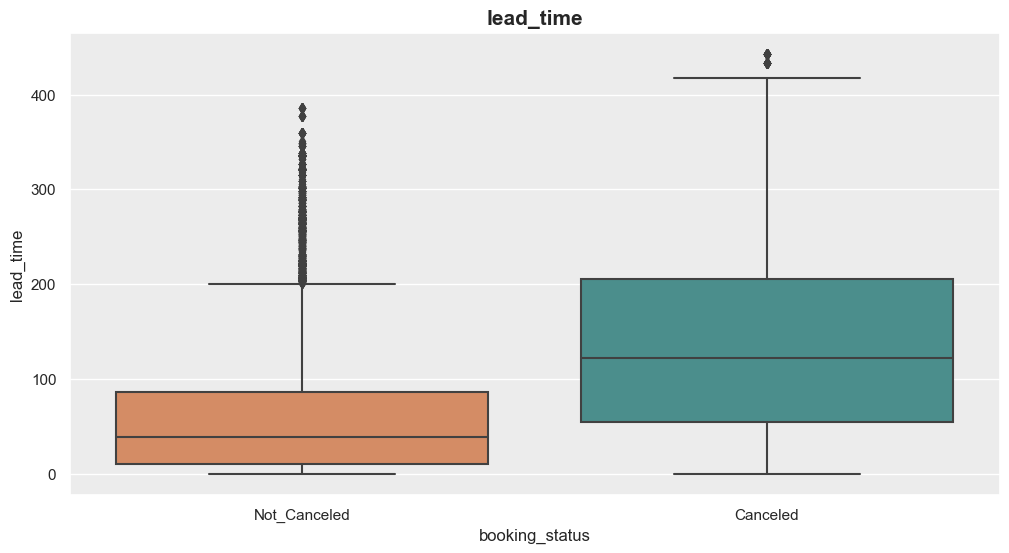

In [13]:
#create a list of numerical features and plot them
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("lead_time", fontsize=15, fontweight='bold', ha='center')
ax = sns.boxplot(x=dataset['booking_status'], y = dataset['lead_time'], data=dataset, palette=palette_features)

#add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

#show the plot
plt.show()

lead_time atrribute clearly doesn't follow normal distribution (prerequisity of Logistic Regression model) and thus we have to use yeojohnson transformation to achieve normal distribution of this attribute. Since lead_time attribute has significantly more variance than the other attributes, it is taken as more significant and we do not want that.

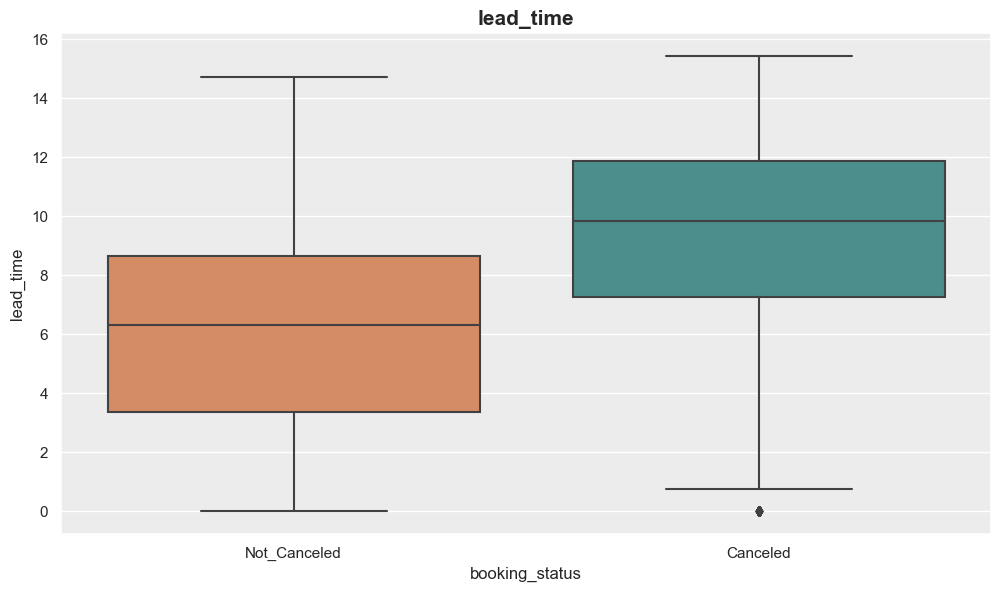

In [14]:
#normalization of lead_time attribute using boxcox function
dataset['lead_time'] = yeojohnson(dataset['lead_time'])[0]

sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6.5)) 
plt.title('lead_time', fontsize=15, fontweight='bold', ha='center')
ax = sns.boxplot(x=dataset['booking_status'], y = dataset['lead_time'], data = dataset, palette=palette_features)

**Conclusions regarding features:**

Last attribute to plot is the target variable, booking_status. As we can notice, target variable is heavily imbalanced, which means that further used ML models will tend to prefer target variable with value 'Not_Canceled' over 'Canceled'. As we want our models to be useful on different, unseen datasets as well, we have to deal with this problem later on.

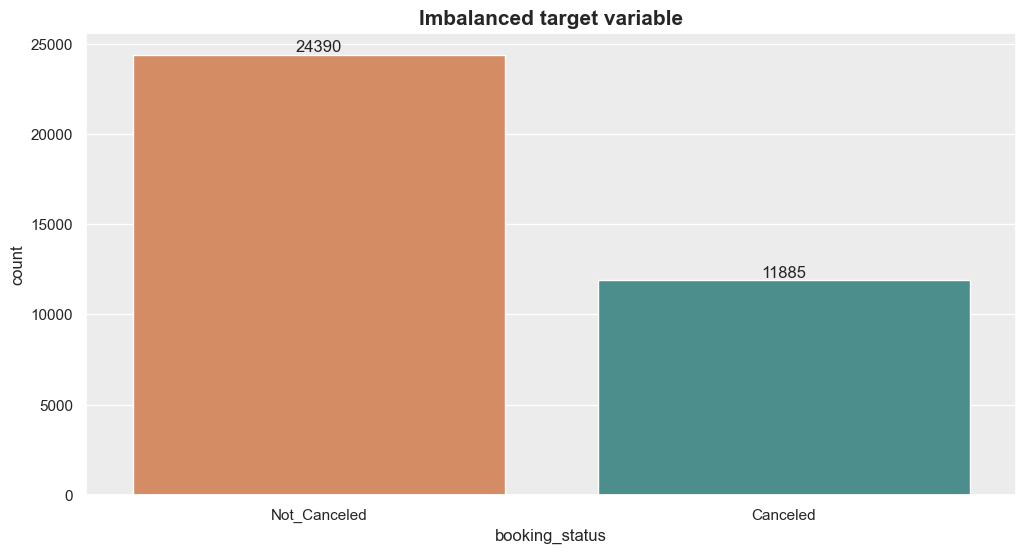

In [15]:
#plotting 'Exited' = target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=dataset['booking_status'], data=dataset, palette=palette_features)

#add labels to each bar
abs_values = dataset['booking_status'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

#show the plot
plt.show()

**2.4 Analyzing relationships between variables**

We would also like to check, whether there are any significant (<= -0.70, >= 0.70) correlations between all features. The highest correlations are between no_of_previous_bookings_not_canceled and repeated_guest (0.54). Nevertheless, it is not enough to consider there relations statistically significant(multicollinearity).

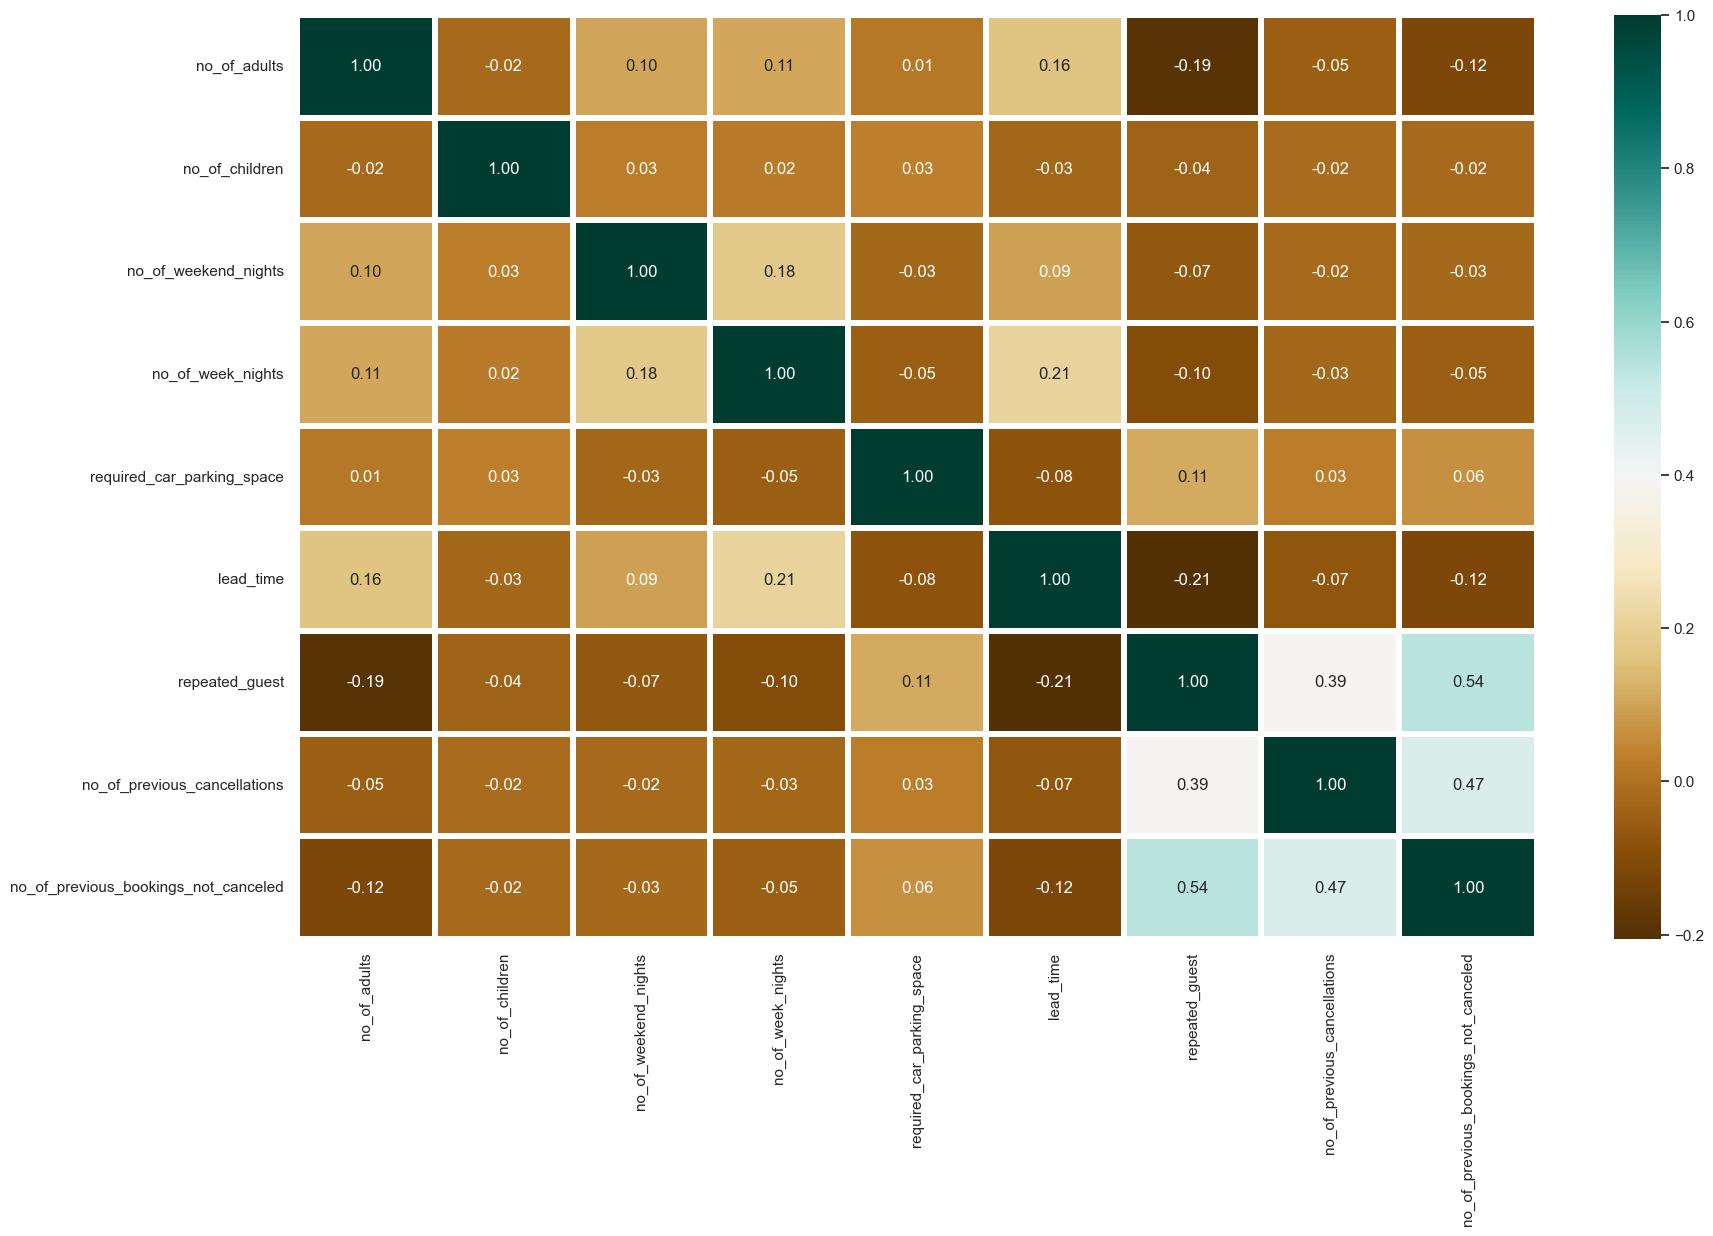

In [16]:
# plotting correlation matrix to notice relationships or lack of it between variables
corr = dataset.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

**From the information we've learned about our dataset, we have to deal with the following challenges:**

* We need to transform all categorical attributes into numerical so that models can mostly work only with numerical inputs.
* The target variable "booking_status" is highly unbalanced. It needs to be balanced in order to be able to implement various machine learning models with fair, unbiased results.


<a id=section-three></a>
# <span style="color:#409996;font-weight:600;font-size:30px;font-style:sans-serif;">3. Overcoming challenges</span>

**3.1. Transformation of categorical attributes**

First of all, let's transform categorical attributes into numerical using LabelEncoder.

In [17]:
# Encode labels in column 'booking_status'.
dataset.loc[dataset['booking_status'] == 'Canceled', 'booking_status'] = pd.to_numeric(1)
dataset.loc[dataset['booking_status'] == 'Not_Canceled', 'booking_status'] = pd.to_numeric(0)
dataset['booking_status'] = pd.to_numeric(dataset['booking_status'])

dataset.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,booking_status
0,2,0,1,2,0,12.231977,0,0,0,0
1,2,0,2,3,0,2.301688,0,0,0,0
2,1,0,2,1,0,0.761920,0,0,0,1
3,2,0,0,2,0,11.978824,0,0,0,1
4,2,0,1,1,0,6.869519,0,0,0,1


##### Classes after being transformed:
* 1: Canceled
* 0: Not_Canceled

**3.2. Balancing the target variable**

Now we can advance to the imbalanced target variable we have to deal with. We will use oversampling strategy using the RandomOverSampler class, thus we will generate same numbers of rows for the value 1 of target variable booking_status, therefore we will get the same number of rows for both values of target variable. If we would not dealt with the imbalanced target variable, machine learning models would then prefer (would be biased toward) class 0 over 1.

In [18]:
#balancing the target variable
columns = dataset.columns[:-1]
y = dataset['booking_status'] #prior target variable
X = dataset[columns]  #prior features

ros = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = ros.fit_resample(X, y) #y_train as balanced target variable
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y_train_balanced)}\n")
print(X_train_balanced.shape[0] - dataset.shape[0], 'new random picked points')

Imbalanced target class: 0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

Balanced target class: Counter({0: 24390, 1: 24390})

12505 new random picked points


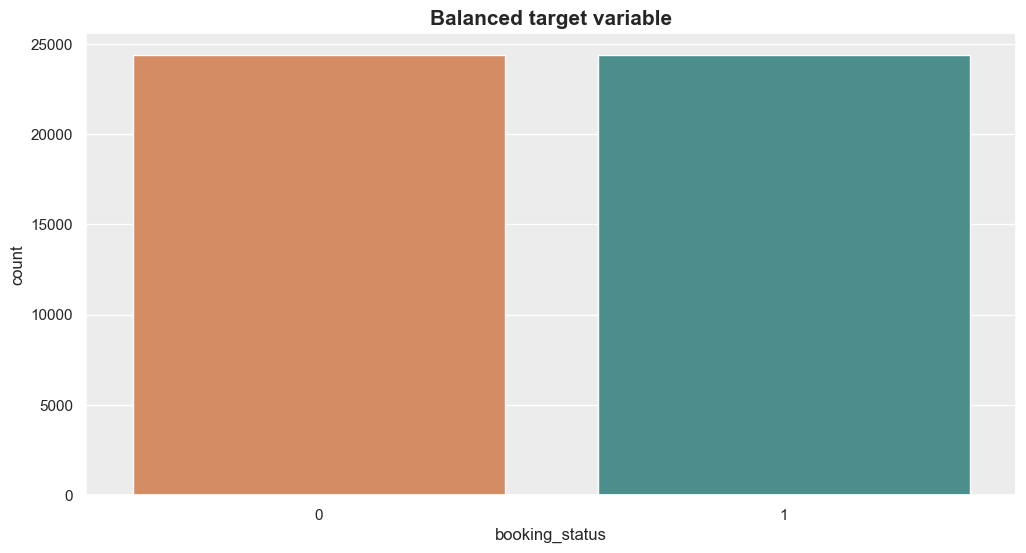

In [19]:
#plot the balanced target variable
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y_train_balanced, data=dataset, palette=palette_features)
plt.show()

<a id=section-four></a>
# <span style="color:#409996;font-weight:600;font-size:30px;font-style:sans-serif;">4. Preparation and implementation of ML models</span>


# <span style="color:#409996;font-weight:600;font-size:20px;font-style:sans-serif;">4.1. Preparation </span>

In [20]:
#preparation of train and test data for ML models
X_train,X_test,y_train,y_test = train_test_split(X_train_balanced, y_train_balanced,test_size=0.3, random_state = 0) #70 % of train data, 30 % of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((34146, 9), (14634, 9), (34146,), (14634,))

In [21]:
# Normalization
ms = MinMaxScaler()
# Normalize the training dataset
X_train_transformed = pd.DataFrame(ms.fit_transform(X_train), index = X_train.index, columns = X_train.columns)
# Normalize the testing dataset
X_test_transformed = pd.DataFrame(ms.transform(X_test), index = X_test.index, columns = X_test.columns)

# <span style="color:#409996;font-weight:600;font-size:20px;font-style:sans-serif;">4.2. Model implementation</span>

**Default Logistic Regression**

In [21]:
# Create Logistic Regression model
lr = LogisticRegression(random_state = 0)
# Create Logistic Regression model
lr.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_lr = lr.predict(X_test)

default_lr_accuracy = accuracy_score(y_test, y_pred_lr)
default_lr_precision = precision_score(y_test, y_pred_lr)
default_lr_recall = recall_score(y_test, y_pred_lr)
default_lr_f1 = f1_score(y_test, y_pred_lr)

              precision    recall  f1-score   support

           0       0.70      0.65      0.68      7332
           1       0.67      0.72      0.70      7302

    accuracy                           0.69     14634
   macro avg       0.69      0.69      0.69     14634
weighted avg       0.69      0.69      0.69     14634

Accuracy Score : 0.688
Precision Score : 0.675
Recall Score : 0.723
F-Score : 0.698


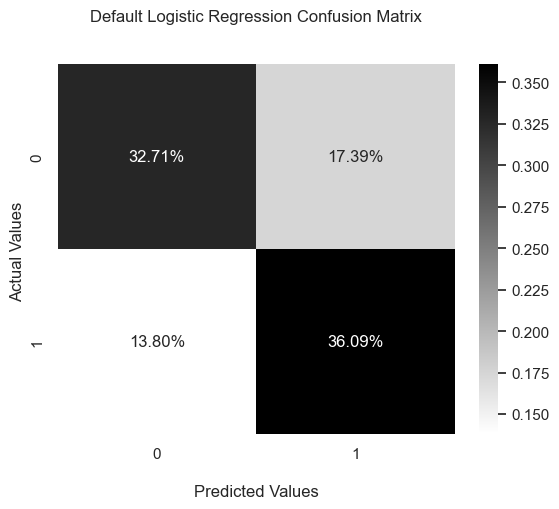

In [22]:
#evaluation of Default Logistic Regression: metrics pivot chart
print(classification_report(y_test, y_pred_lr))

print('Accuracy Score : ' + str(round(default_lr_accuracy,3)))
print('Precision Score : ' + str(round(default_lr_precision,3)))
print('Recall Score : ' + str(round(default_lr_recall,3)))
print('F-Score : ' + str(round(default_lr_f1,3)))

cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default Logistic Regression Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Default SVM(SVC)**

In [23]:
# Create SVM model
svm = SVC(random_state = 0)
# Create SVM model
svm.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_svm = svm.predict(X_test)

default_svm_accuracy = accuracy_score(y_test, y_pred_svm)
default_svm_precision = precision_score(y_test, y_pred_svm)
default_svm_recall = recall_score(y_test, y_pred_svm)
default_svm_f1 = f1_score(y_test, y_pred_svm)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      7332
           1       0.71      0.66      0.68      7302

    accuracy                           0.70     14634
   macro avg       0.70      0.70      0.70     14634
weighted avg       0.70      0.70      0.70     14634

Accuracy Score : 0.698
Precision Score : 0.714
Recall Score : 0.657
F-Score : 0.684


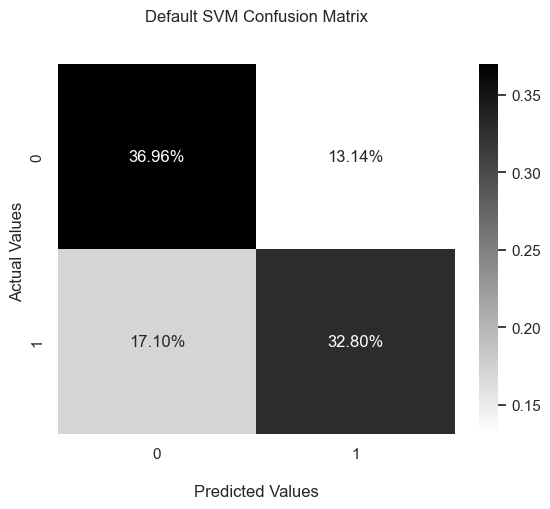

In [24]:
#evaluation of Default SVM: metrics pivot chart
print(classification_report(y_test, y_pred_svm))

print('Accuracy Score : ' + str(round(default_svm_accuracy,3)))
print('Precision Score : ' + str(round(default_svm_precision,3)))
print('Recall Score : ' + str(round(default_svm_recall,3)))
print('F-Score : ' + str(round(default_svm_f1,3)))

cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default SVM Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Default K-Nearest Neighbors**

In [25]:
# Create Default K-Nearest Neighbors model
knn = KNeighborsClassifier()
# Create Default K-Nearest Neighbors model
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)

#evaluation
default_knn_accuracy = accuracy_score(y_test, y_pred_knn)
default_knn_precision = precision_score(y_test, y_pred_knn)
default_knn_recall = recall_score(y_test, y_pred_knn)
default_knn_f1 = f1_score(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      7332
           1       0.75      0.75      0.75      7302

    accuracy                           0.75     14634
   macro avg       0.75      0.75      0.75     14634
weighted avg       0.75      0.75      0.75     14634

Accuracy Score : 0.751
Precision Score : 0.751
Recall Score : 0.75
F-Score : 0.75


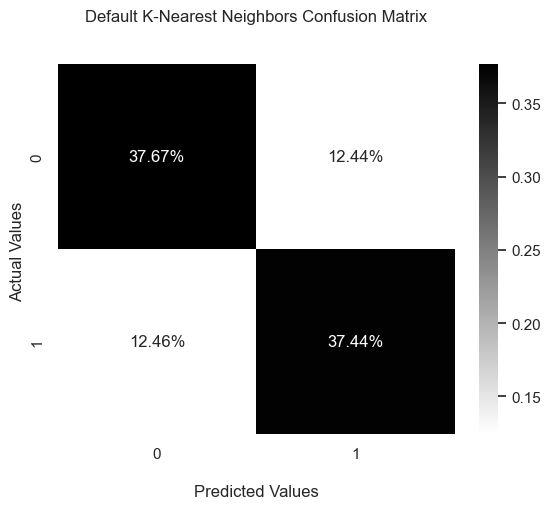

In [26]:
#evaluation of Default K-Nearest Neighbors: metrics pivot chart
print(classification_report(y_test, y_pred_knn))

print('Accuracy Score : ' + str(round(default_knn_accuracy,3)))
print('Precision Score : ' + str(round(default_knn_precision,3)))
print('Recall Score : ' + str(round(default_knn_recall,3)))
print('F-Score : ' + str(round(default_knn_f1,3)))

cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
ax = sns.heatmap(cf_matrix_knn/np.sum(cf_matrix_knn), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default K-Nearest Neighbors Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Default Decision Tree**

In [27]:
# Create Default Decision Tree model
dt = DecisionTreeClassifier(random_state = 0)
# Create Default Decision Tree model
dt.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

#evaluation
default_dt_accuracy = accuracy_score(y_test, y_pred_dt)
default_dt_precision = precision_score(y_test, y_pred_dt)
default_dt_recall = recall_score(y_test, y_pred_dt)
default_dt_f1 = f1_score(y_test, y_pred_dt)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      7332
           1       0.80      0.75      0.77      7302

    accuracy                           0.78     14634
   macro avg       0.78      0.78      0.78     14634
weighted avg       0.78      0.78      0.78     14634

Accuracy Score : 0.78
Precision Score : 0.795
Recall Score : 0.752
F-Score : 0.773


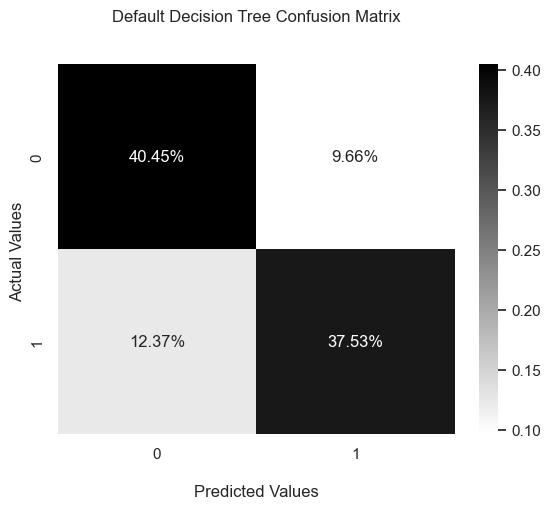

In [28]:
#evaluation of Default Decision Tree: metrics pivot chart
print(classification_report(y_test, y_pred_dt))

print('Accuracy Score : ' + str(round(default_dt_accuracy,3)))
print('Precision Score : ' + str(round(default_dt_precision,3)))
print('Recall Score : ' + str(round(default_dt_recall,3)))
print('F-Score : ' + str(round(default_dt_f1,3)))

cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
ax = sns.heatmap(cf_matrix_dt/np.sum(cf_matrix_dt), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default Decision Tree Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Default Random Forest**

In [29]:
# Create Default Random Forest model
rf = RandomForestClassifier(random_state = 0)
# Create Default Random Forest model
# rf.fit(X_train_transformed, y_train)
rf.fit(X_train, y_train)

#Predict the response for test dataset
# y_pred_rf = rf.predict(X_test_transformed)
# print( X_test_transformed, y_pred_rf)
y_pred_rf = rf.predict(X_test)

print(y_pred_rf)

#evaluation
default_rf_accuracy = accuracy_score(y_test, y_pred_rf)
default_rf_precision = precision_score(y_test, y_pred_rf)
default_rf_recall = recall_score(y_test, y_pred_rf)
default_rf_f1 = f1_score(y_test, y_pred_rf)

[0 1 1 ... 0 1 1]


In [53]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      7332
           1       0.78      0.78      0.78      7302

    accuracy                           0.78     14634
   macro avg       0.78      0.78      0.78     14634
weighted avg       0.78      0.78      0.78     14634

Accuracy Score : 0.784
Precision Score : 0.784
Recall Score : 0.783
F-Score : 0.784


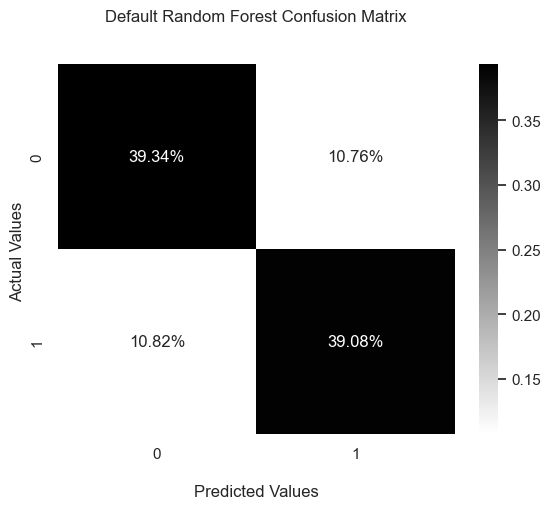

In [30]:
#evaluation of Default Random Forest: metrics pivot chart
print(classification_report(y_test, y_pred_rf))

print('Accuracy Score : ' + str(round(default_rf_accuracy,3)))
print('Precision Score : ' + str(round(default_rf_precision,3)))
print('Recall Score : ' + str(round(default_rf_recall,3)))
print('F-Score : ' + str(round(default_rf_f1,3)))

cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Default Random Forest Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

<a id=section-five></a>
# <span style="color:#409996;font-weight:600;font-size:30px;font-style:sans-serif;">5. Results evaluation</span>

In this notebook, we aimed to find the most accurate model with highest recall for our dataset of hotel customer.

In [31]:
#dictionary with all metrics
accuracies = {"Default Logistic Regression": default_lr_accuracy, 
              "Default SVM": default_svm_accuracy, 
              "Default KNN": default_knn_accuracy, 
              "Default Decision Tree": default_dt_accuracy, 
              "Default Random Forest": default_rf_accuracy, 
              }
print("The algorithm with highest accuracy: " + max(accuracies, key=accuracies.get))

precisions = {"Default Logistic Regression": default_lr_precision, 
              "Default SVM": default_svm_precision, 
              "Default KNN": default_knn_precision, 
              "Default Decision Tree": default_dt_precision, 
              "Default Random Forest": default_rf_precision, 
              }
print("The algorithm with highest precision: " + max(precisions, key=precisions.get))

recalls = {"Default Logistic Regression": default_lr_recall, 
           "Default SVM": default_svm_recall, 
           "Default KNN": default_knn_recall,  
           "Default Decision Tree": default_dt_recall, 
           "Default Random Forest": default_rf_recall, 
           }
print("The algorithm with highest recall: " + max(recalls, key=recalls.get))

f1_scores = {"Default Logistic Regression": default_lr_f1, 
             "Default SVM": default_svm_f1, 
             "Default KNN": default_knn_f1,  
             "Default Decision Tree": default_dt_f1, 
             "Default Random Forest": default_rf_f1, 
             }
print("The algorithm with highest f1_score: " + max(recalls, key=recalls.get))


The algorithm with highest accuracy: Default Random Forest
The algorithm with highest precision: Default Decision Tree
The algorithm with highest recall: Default Random Forest
The algorithm with highest f1_score: Default Random Forest


In [32]:
#pivot table with accuracy, precision and recall metrics results
models_keys             = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())
#precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
recall_models_values    = list(recalls.values())
f1_score_models_values  = list(f1_scores.values())

df_models               = pd.DataFrame({"Model":models_keys,
                                       "Accuracy":accuracy_models_values,
                                       "Precision": precision_models_values,
                                       "Recall": recall_models_values,
                                       "F1_Score": f1_score_models_values})
print(df_models)

                         Model  Accuracy  Precision    Recall  F1_Score
0  Default Logistic Regression  0.688055   0.674843  0.723363  0.698262
1                  Default SVM  0.697622   0.713967  0.657354  0.684492
2                  Default KNN  0.751059   0.750651  0.750342  0.750497
3        Default Decision Tree  0.779759   0.795366  0.752123  0.773140
4        Default Random Forest  0.784201   0.784069  0.783210  0.783639


In [33]:
#preparation for plotting the metrics
accuracy_models_keys    = list(accuracies.keys())
accuracy_models_values  = list(accuracies.values())

df_accuracy             = pd.DataFrame({"Model":accuracy_models_keys,
                                        "Accuracy":accuracy_models_values})

precision_models_keys   = list(precisions.keys())
precision_models_values = list(precisions.values())
df_precision            = pd.DataFrame({"Model": precision_models_keys,
                                        "Precision": precision_models_values})

recall_models_keys      = list(recalls.keys())
recall_models_values    = list(recalls.values())
df_recall               = pd.DataFrame({"Model": recall_models_keys,
                                        "Recall": recall_models_values})

f1_score_models_keys    = list(f1_scores.keys())
f1_score_models_values  = list(f1_scores.values())
df_f1_score             = pd.DataFrame({"Model": f1_score_models_keys,
                                        "F1_score": f1_score_models_values})

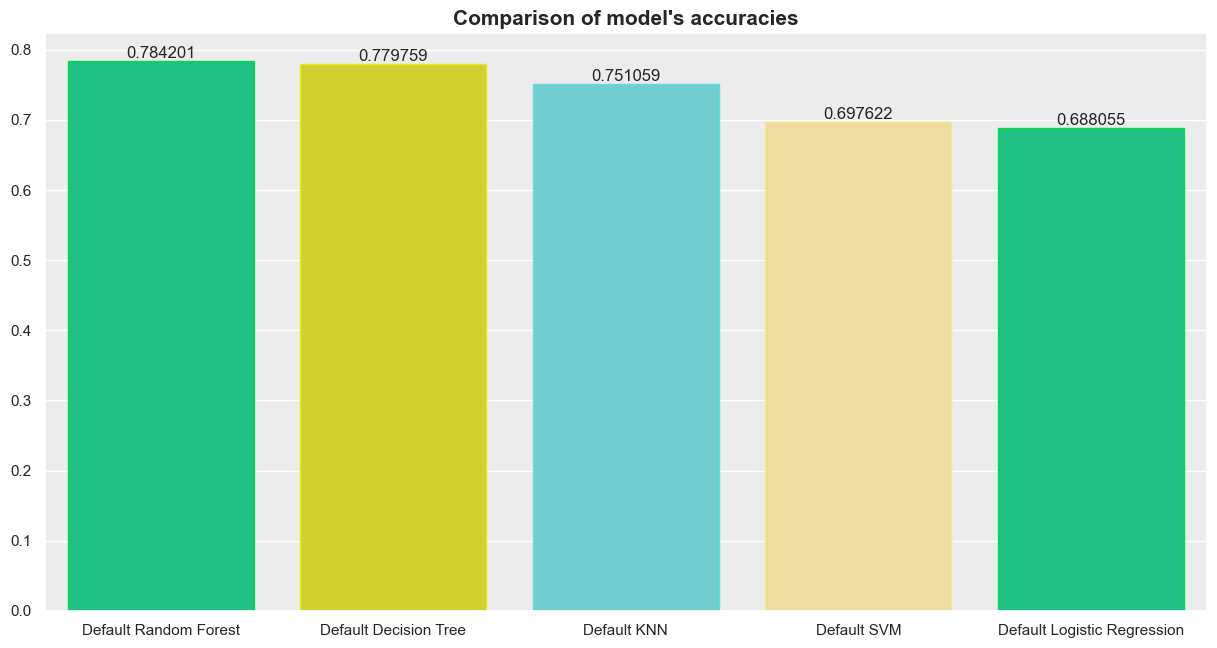

In [34]:
#model's accuracy evaluation in barplot
olympic_medals_palette = ['#04DB88','#EBE915', '#61DCDF', '#F9E492']
olympic_medals_edge_colors = ['#04DB41','#EBE915', '#61DCDF', '#F9E492']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_accuracy.sort_values('Accuracy', ascending=False).Model)
plt.title(label = "Comparison of model's accuracies", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

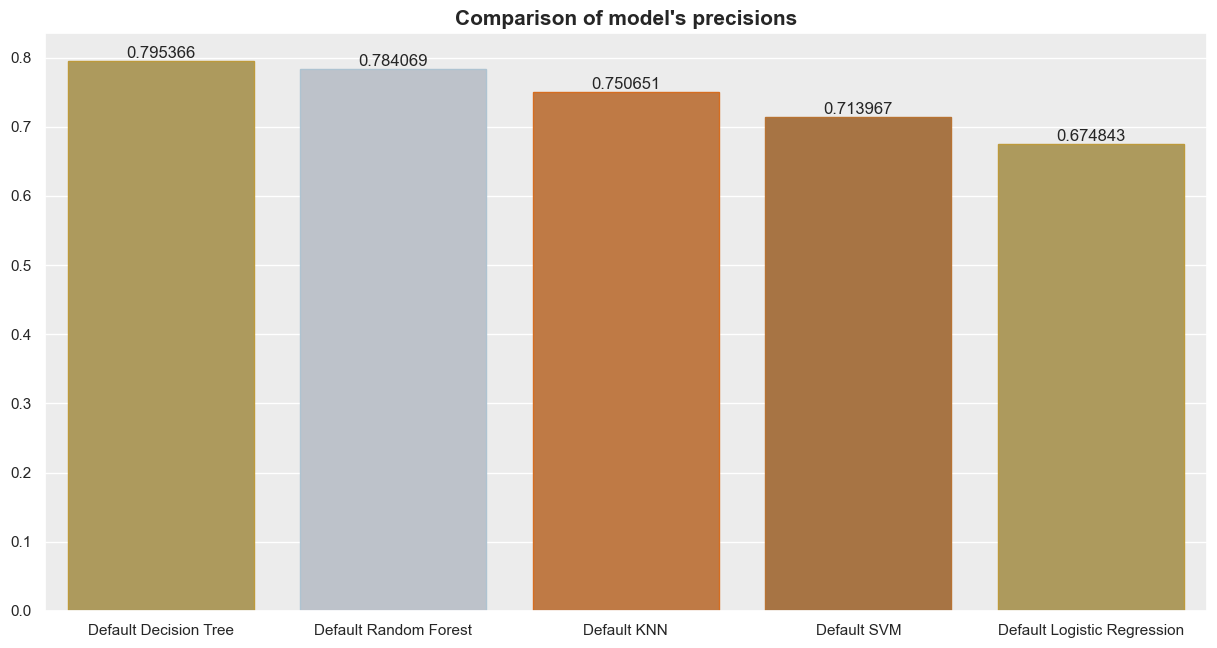

In [34]:
#model's precision evaluation in barplot
olympic_medals_palette = ['#04DB88','#EBE915', '#61DCDF', '#F9E492']
olympic_medals_edge_colors = ['#04DB41','#EBE915', '#61DCDF', '#F9E492']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(precisions.keys()), y = list(precisions.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_precision.sort_values("Precision", ascending=False).Model)
plt.title(label = "Comparison of model's precisions", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

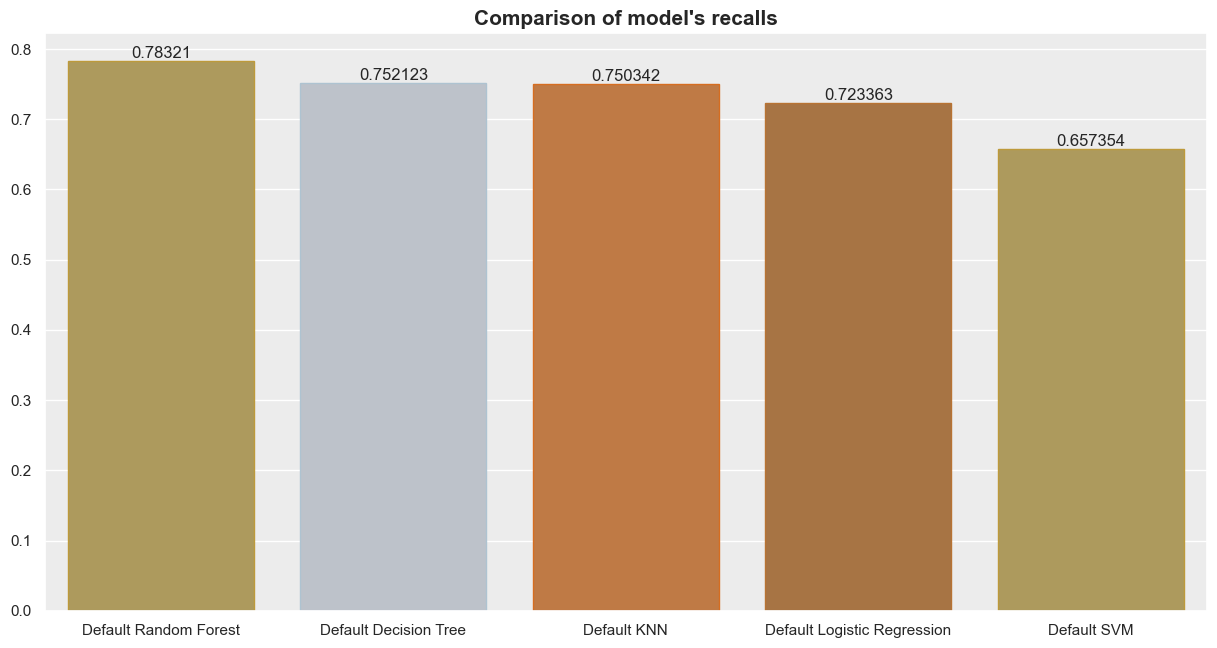

In [35]:
#model's recall evaluation in barplot
olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731', '#B87333']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20', '#B87333']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(recalls.keys()), y = list(recalls.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_recall.sort_values("Recall", ascending=False).Model)
plt.title(label = "Comparison of model's recalls", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()

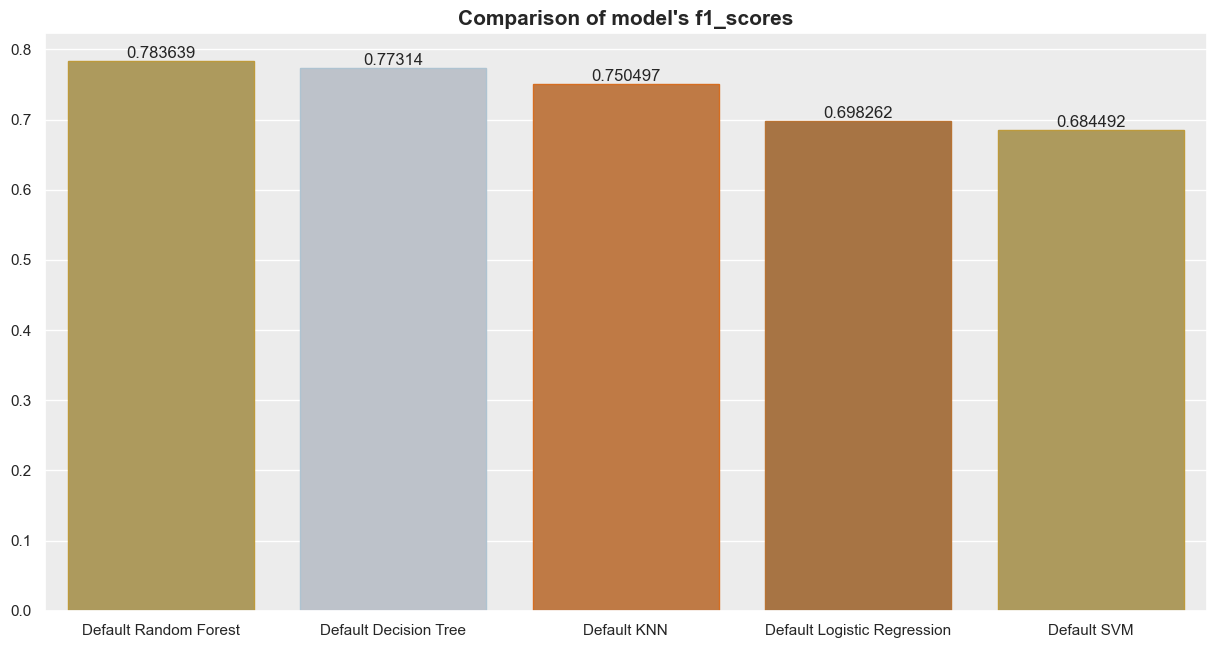

In [36]:
#model's f1_score evaluation in barplot
olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731', '#B87333']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20', '#B87333']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot

plt.figure(figsize = (15,7.5))
ax = sns.barplot(x = list(f1_scores.keys()), y = list(f1_scores.values()), palette = olympic_medals_palette,  edgecolor = olympic_medals_edge_colors, order=df_f1_score.sort_values("F1_score", ascending=False).Model)
plt.title(label = "Comparison of model's f1_scores", fontsize = 15, fontweight = 'bold', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()